In [3]:
import torch
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
digits = sk.datasets.load_digits()

In [6]:
X = digits.data/16
y = digits.target

In [7]:
X_train, X_test, y_train, y_test = split(X, y, test_size = 0.2, random_state=42)

In [8]:
model = SVC()

In [9]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [10]:
print(classification_report(y_test, predictions, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    1.0000    1.0000        34
           4     1.0000    1.0000    1.0000        46
           5     0.9787    0.9787    0.9787        47
           6     0.9722    1.0000    0.9859        35
           7     0.9706    0.9706    0.9706        34
           8     1.0000    0.9667    0.9831        30
           9     0.9500    0.9500    0.9500        40

    accuracy                         0.9861       360
   macro avg     0.9872    0.9866    0.9868       360
weighted avg     0.9862    0.9861    0.9861       360



In [11]:
i = 7
img = X_test[i].reshape(8,8)

In [12]:
p = model.predict(X_test[i].reshape(1, 64))

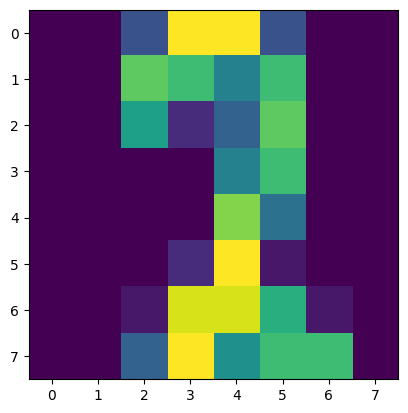

In [13]:
plt.imshow(img)

In [14]:
p

array([2])

In [16]:
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(21)
device="cpu"

In [17]:
X_train.shape

(1437, 64)

In [22]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
Y_train=torch.tensor(y_train)
Y_test=torch.tensor(y_test)

model=nn.Sequential(
    nn.Linear(64,10),
)
cryterial=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4648\1460125702.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train=torch.tensor(X_train, dtype=torch.float32)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4648\1460125702.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test=torch.tensor(X_test,dtype=torch.float32)


In [24]:
model.eval()

Sequential(
  (0): Linear(in_features=64, out_features=10, bias=True)
)

In [30]:
epohs=128
B_s=32
for epoh in range(1,epohs+1):
    model.train()
    X_train=X_train[torch.randperm(X_train.shape[0])]
    running_loss=0
    for start in range(0,X_train.shape[0],B_s):
        x_b=X_train[start:start+B_s]
        y_b=Y_train[start:start+B_s]
        optimizer.zero_grad()
        preds=model(x_b)
        loss=cryterial(preds,y_b)
        loss.backward()
        optimizer.step()
        print(epoh,start,loss.item())

1 0 5.002768039703369
1 32 7.9078264236450195
1 64 9.169995307922363
1 96 8.971809387207031
1 128 6.422828674316406
1 160 9.264116287231445
1 192 7.686038017272949
1 224 6.383025646209717
1 256 6.53269100189209
1 288 6.429792404174805
1 320 5.50136137008667
1 352 8.751044273376465
1 384 7.595259666442871
1 416 8.235698699951172
1 448 7.022195816040039
1 480 6.70829439163208
1 512 6.878528594970703
1 544 7.957188606262207
1 576 7.687905788421631
1 608 9.41579818725586
1 640 6.927663326263428
1 672 7.463656902313232
1 704 8.802497863769531
1 736 7.445962905883789
1 768 5.804075241088867
1 800 4.881827354431152
1 832 6.041046142578125
1 864 5.564035892486572
1 896 6.1962409019470215
1 928 6.344846248626709
1 960 4.651869297027588
1 992 4.973549842834473
1 1024 4.687808990478516
1 1056 5.640104293823242
1 1088 5.42551326751709
1 1120 6.133742332458496
1 1152 6.98732852935791
1 1184 5.862873077392578
1 1216 6.241930961608887
1 1248 6.130600452423096
1 1280 4.504086017608643
1 1312 5.2453656

In [31]:
with torch.no_grad():
    preds=model(X_test)

In [32]:
preds

tensor([[171.2653, 174.5823, 173.4492,  ..., 167.0919, 171.5578, 167.6930],
        [197.6825, 197.8119, 197.9047,  ..., 191.1506, 191.0578, 196.8107],
        [154.1857, 154.5220, 154.3485,  ..., 155.1296, 150.9702, 153.3114],
        ...,
        [190.0771, 190.2246, 188.9433,  ..., 186.6251, 187.9819, 188.6069],
        [215.9256, 215.2973, 216.6702,  ..., 213.7981, 213.4041, 216.5991],
        [182.6455, 181.5999, 182.3150,  ..., 177.5717, 182.2865, 179.7519]])

In [33]:
preds.argmax(axis=1)

tensor([3, 2, 7, 4, 0, 0, 1, 4, 1, 0, 4, 4, 1, 1, 4, 0, 2, 4, 4, 2, 4, 4, 0, 3,
        1, 1, 3, 0, 1, 3, 9, 4, 3, 1, 4, 1, 2, 4, 3, 1, 3, 0, 0, 3, 1, 4, 0, 1,
        1, 1, 4, 2, 3, 1, 1, 1, 3, 1, 1, 4, 4, 4, 4, 2, 2, 1, 1, 1, 9, 3, 3, 3,
        1, 1, 3, 1, 3, 1, 3, 9, 3, 1, 0, 4, 1, 1, 3, 4, 4, 2, 4, 9, 4, 3, 3, 0,
        2, 4, 1, 1, 4, 4, 2, 4, 4, 4, 1, 4, 9, 2, 4, 3, 4, 1, 4, 9, 4, 3, 1, 4,
        9, 1, 4, 3, 1, 3, 1, 9, 0, 4, 3, 0, 8, 4, 1, 1, 1, 4, 4, 1, 1, 3, 4, 1,
        1, 4, 1, 3, 4, 3, 1, 1, 1, 1, 1, 9, 3, 0, 3, 2, 9, 0, 3, 1, 3, 1, 4, 1,
        1, 4, 3, 1, 4, 1, 0, 1, 4, 3, 0, 0, 3, 4, 4, 1, 2, 1, 2, 0, 1, 9, 2, 1,
        1, 1, 4, 9, 3, 3, 4, 4, 3, 2, 1, 4, 2, 3, 9, 4, 0, 0, 4, 4, 3, 1, 4, 0,
        1, 1, 4, 1, 1, 4, 3, 1, 4, 8, 1, 4, 3, 0, 0, 1, 3, 2, 3, 0, 4, 3, 1, 4,
        2, 1, 1, 2, 3, 4, 4, 1, 4, 1, 4, 3, 0, 0, 3, 3, 1, 4, 4, 4, 1, 1, 3, 0,
        9, 1, 0, 3, 4, 1, 2, 1, 1, 1, 1, 4, 3, 1, 4, 4, 1, 2, 3, 9, 1, 1, 3, 9,
        9, 4, 0, 4, 0, 4, 1, 1, 4, 1, 4,

In [34]:
confusion_matrix(y_test, preds.argmax(axis=1))

array([[ 0, 26,  0,  1,  5,  0,  0,  0,  0,  1],
       [ 7,  2,  5,  3, 11,  0,  0,  0,  0,  0],
       [14,  6,  4,  1,  5,  0,  0,  0,  0,  3],
       [ 3,  4,  2, 12,  9,  0,  0,  1,  0,  3],
       [ 0, 10,  1,  5, 26,  0,  0,  0,  0,  4],
       [ 7, 23,  2, 10,  4,  0,  0,  0,  1,  0],
       [ 0, 27,  1,  7,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0, 10, 14,  0,  0,  0,  1,  7],
       [ 1,  6,  5,  0, 18,  0,  0,  0,  0,  0],
       [ 3,  3,  7, 14,  8,  0,  0,  0,  0,  5]])

In [35]:
print (classification_report(y_test, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.02      0.07      0.03        28
           2       0.15      0.12      0.13        33
           3       0.19      0.35      0.25        34
           4       0.26      0.57      0.36        46
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        30
           9       0.22      0.12      0.16        40

    accuracy                           0.14       360
   macro avg       0.08      0.12      0.09       360
weighted avg       0.09      0.14      0.10       360



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave